# Chargement des modules 

In [58]:
# Les classiques
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# visualisation dynamique
import plotly.express as px

# Modules pour les séries chronologiques
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

# Chargement des données et visualisation

In [74]:

path = "/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Série chronologiques_Proïa/projet_electricité/Dataset_CB.csv"

EDF = pd.read_csv(path)

EDF.columns = ["DATE","CONSO"]

EDF.DATE = pd.to_datetime(EDF.DATE,format='%d/%m/%y %H:%M')

print("shape = ",EDF.shape)

EDF


shape =  (744, 2)


,DATE,CONSO
0,2023-08-01 00:00:00,522.646044
1,2023-08-01 01:00:00,142.889213
2,2023-08-01 02:00:00,497.052422
3,2023-08-01 03:00:00,110.082063
4,2023-08-01 04:00:00,333.036926
...,...,...
739,2023-08-31 19:00:00,1216.824530
740,2023-08-31 20:00:00,1867.397655
741,2023-08-31 21:00:00,6456.590007
742,2023-08-31 22:00:00,915.149345


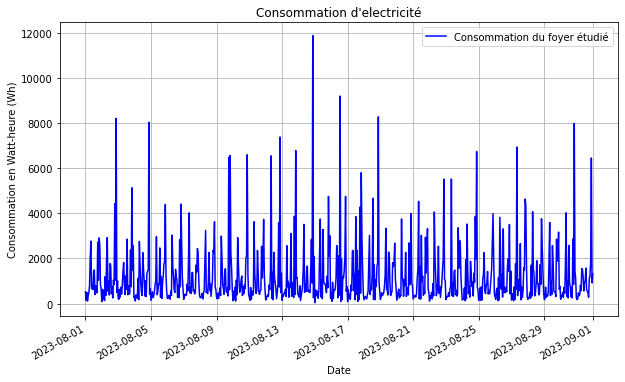

In [79]:
# Tracez les données avec une ligne solide bleue et ajoutez des marqueurs

plt.figure(figsize=(10,6))
plt.plot(EDF.DATE.values, EDF.CONSO.values, linestyle='-', color='b', label='Consommation du foyer étudié')
plt.legend()
plt.title("Consommation d'electricité")
plt.xlabel("Date")
plt.ylabel("Consommation en Watt-heure (Wh)")
plt.gcf().autofmt_xdate() # Personnalisez les axes pour afficher les dates de manière plus lisible
plt.grid(True)
plt.show()

# Passage au log pour atténuer les pics  

In [80]:
EDF['LOGCONSO'] = np.log(EDF.CONSO)
EDF.head()

,DATE,CONSO,LOGCONSO
0,2023-08-01 00:00:00,522.646044,6.258904
1,2023-08-01 01:00:00,142.889213,4.962070
2,2023-08-01 02:00:00,497.052422,6.208695
3,2023-08-01 03:00:00,110.082063,4.701226
4,2023-08-01 04:00:00,333.036926,5.808253


In [81]:
# Créez un graphique interactif avec Plotly Express
fig = px.line(EDF, x='DATE', y='LOGCONSO', labels={'DATE': 'Date', 'LOGCONSO': 'Log consommation'})
fig.update_layout(title="Consommation d'énergie")

# Affichez le graphique interactif
fig.show()

# Test de Stationnarité 

In [55]:
# Testons la non-stationnarité 
TestA = adfuller(EDF.LOGCONSO) # Test ADF rejeté
print("ADF p-val : ", TestA[1])

# Testons la stationnarité 
TestK = kpss(EDF.LOGCONSO) # Test KPSS non rejeté 
print("KPSS p-val : ", TestK[1])# Test non rejeté au 

ADF p-val :  0.0
KPSS p-val :  0.1


/tmp/ipykernel_115491/3400398074.py:6: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




# Étude des corrélations

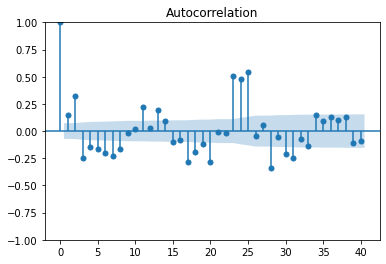

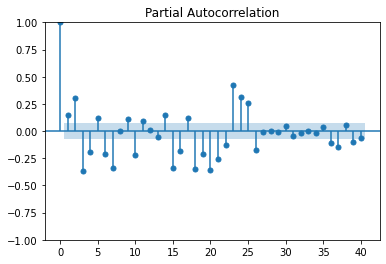

In [57]:
ACF = plot_acf(EDF.LOGCONSO, lags=40, alpha=0.05) 
PACF = plot_pacf(EDF.LOGCONSO, lags=40, alpha=0.05)

On remarque qu'il y a un regain d'amplitude dans l'ACF au niveau de